In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
url = "https://iex.lewagon.com/v1/data/core/historical_prices/aapl?range=3m#"
api_data = requests.get(url).json()
apple_df = pd.DataFrame.from_dict(api_data)
apple_df.head()

,close,fclose,fhigh,flow,fopen,fvolume,high,low,open,priceDate,...,uhigh,ulow,uopen,uvolume,volume,id,key,subkey,date,updated
0,193.89,193.89,195.33,192.260,192.30,60133852,195.33,192.260,192.30,2024-01-22,...,195.33,192.260,192.30,60133852,60133852,HISTORICAL_PRICES,AAPL,,1705881600000,1705980820000
1,191.56,191.56,191.95,188.820,189.33,68902985,191.95,188.820,189.33,2024-01-19,...,191.95,188.820,189.33,68902985,68902985,HISTORICAL_PRICES,AAPL,,1705622400000,1705717829000
2,188.63,188.63,189.14,185.830,186.09,78005754,189.14,185.830,186.09,2024-01-18,...,189.14,185.830,186.09,78005754,78005754,HISTORICAL_PRICES,AAPL,,1705536000000,1705629628000
3,182.68,182.68,182.93,180.300,181.27,47317433,182.93,180.300,181.27,2024-01-17,...,182.93,180.300,181.27,47317433,47317433,HISTORICAL_PRICES,AAPL,,1705449600000,1705543280000
4,183.63,183.63,184.26,180.934,182.16,65603041,184.26,180.934,182.16,2024-01-16,...,184.26,180.934,182.16,65603041,65603041,HISTORICAL_PRICES,AAPL,,1705363200000,1705456923000


In [3]:
apple_df["date"] = pd.to_datetime(apple_df["date"], unit='ms')
apple_df = apple_df.set_index("date")
apple_df.head(2)

,close,fclose,fhigh,flow,fopen,fvolume,high,low,open,priceDate,...,uclose,uhigh,ulow,uopen,uvolume,volume,id,key,subkey,updated
date,,,,,,,,,,,,,,,,,,,,,
2024-01-22,193.89,193.89,195.33,192.26,192.30,60133852,195.33,192.26,192.30,2024-01-22,...,193.89,195.33,192.26,192.30,60133852,60133852,HISTORICAL_PRICES,AAPL,,1705980820000
2024-01-19,191.56,191.56,191.95,188.82,189.33,68902985,191.95,188.82,189.33,2024-01-19,...,191.56,191.95,188.82,189.33,68902985,68902985,HISTORICAL_PRICES,AAPL,,1705717829000


<AxesSubplot:xlabel='date'>

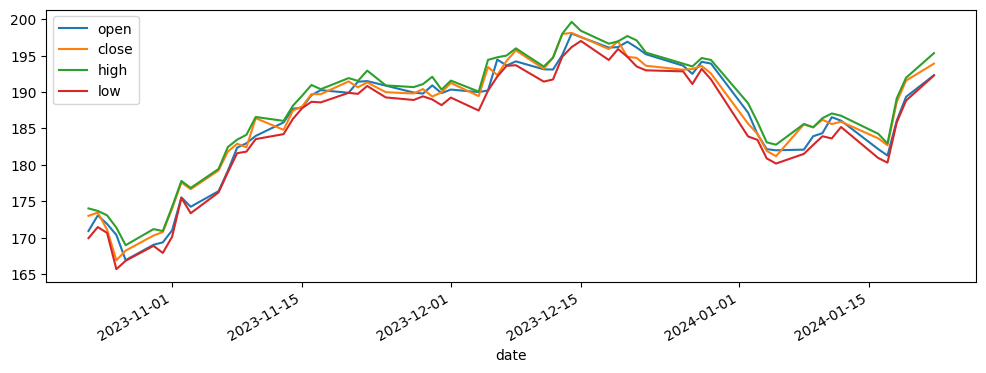

In [4]:
apple_df[["open", "close", "high", "low"]].plot(figsize=(12, 4))

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/02-Data-Toolkit/02-Data-Sourcing/data-stock-market-api/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns FAILED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

=================================== FAILURES ===================================
_______________________ TestApple.test_apple_df_columns ________________________

self = <tests.test_apple.TestApple testMethod=test_apple_df_columns>

    def test_apple_df_columns(self):
        columns = {
            'close', 'high', 'low'

In [6]:
apple_df.columns

Index(['close', 'fclose', 'fhigh', 'flow', 'fopen', 'fvolume', 'high', 'low',
       'open', 'priceDate', 'symbol', 'uclose', 'uhigh', 'ulow', 'uopen',
       'uvolume', 'volume', 'id', 'key', 'subkey', 'updated'],
      dtype='object')